In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
mydataframe=pd.read_csv("diabetes.csv")
mydataframe

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [3]:
#Printng patient Id only for the first 7 patients
mydataframe.head(7)["PatientID"]

0    1354778
1    1147438
2    1640031
3    1883350
4    1424119
5    1619297
6    1660149
Name: PatientID, dtype: int64

In [4]:
#Deleting the column that won't be of use during training of model
#Now assuming I won't use the SerumInsulin column , i would simply say
mydataframe.drop('SerumInsulin',axis=1,inplace=True)

In [5]:
mydataframe.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,43.509726,1.213191,21,0
1,1147438,8,92,93,47,21.240576,0.158365,23,0
2,1640031,7,115,47,52,41.511523,0.079019,23,0
3,1883350,9,103,78,25,29.582192,1.282870,43,1
4,1424119,1,85,59,27,42.604536,0.549542,22,0


In [6]:
#creating histogram for Diastolic Blood Pressure
mydatalist=mydataframe["DiastolicBloodPressure"]

(array([ 118.,  370., 1648., 2769., 2399., 1831., 3631., 1845.,  286.,
         103.]),
 array([ 24. ,  33.3,  42.6,  51.9,  61.2,  70.5,  79.8,  89.1,  98.4,
        107.7, 117. ]),
 <a list of 10 Patch objects>)

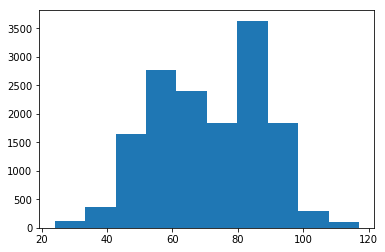

In [7]:
mydatalist
from random import sample
data=sample(range(1000),100)
plt.hist(mydataframe['DiastolicBloodPressure'],10)

([<matplotlib.patches.Wedge at 0x16f864a14a8>,
 [Text(-0.9526279613277876, 0.5499999702695114, 'diabetic'),
  Text(0.9526280128224967, -0.5499998810780429, 'nondiabetic')])

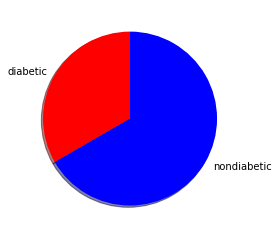

In [8]:
# to draw a pie chart of diabetic and non diabetic ,
#we first need to find their values
diabetic=[]
nondiabetic=[]
for num in mydataframe['Diabetic']:
    if (num==0):
        nondiabetic.append(num)
    elif(num==1):
        diabetic.append(num)
slices = [len(diabetic),len(nondiabetic)]
options = ['diabetic','nondiabetic']
cols = ['r','b']

plt.pie(slices,
        labels=options,
        colors=cols,
        startangle=90,
        shadow= True)
     


In [9]:
#Finding total non diabetic
nondiabetic=[]
for num in mydataframe['Diabetic']:
    if num==0:
        nondiabetic.append(num)

In [10]:
len(nondiabetic)

10000

In [11]:
#Selecting all rows where pregnancies is greater than 5
mydataframe[mydataframe['Pregnancies']>5]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,BMI,DiabetesPedigree,Age,Diabetic
1,1147438,8,92,93,47,21.240576,0.158365,23,0
2,1640031,7,115,47,52,41.511523,0.079019,23,0
3,1883350,9,103,78,25,29.582192,1.282870,43,1
8,1201647,8,80,95,33,26.624929,0.443947,53,1
13,1669231,7,110,82,16,36.089293,0.281276,25,0
18,1536832,8,117,39,32,21.230996,0.089363,25,0
25,1710438,9,104,68,42,51.855401,0.182938,21,1
26,1139740,6,135,91,31,45.274113,0.707163,21,1
30,1121857,11,75,89,8,29.422754,0.083732,47,1
31,1117458,8,152,83,42,18.909545,0.602582,34,0


In [12]:
#Selecting third cell in row named BMI
mydataframe['BMI'][2]

41.51152348

In [13]:
#printing column names for my dataframe
mydataframe.columns.tolist()

['PatientID',
 'Pregnancies',
 'PlasmaGlucose',
 'DiastolicBloodPressure',
 'TricepsThickness',
 'BMI',
 'DiabetesPedigree',
 'Age',
 'Diabetic']

In [14]:
#Printing datatypes for my column names
mydataframe.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [15]:
#Summarizing all the columns
mydataframe.head(2)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,43.509726,1.213191,21,0
1,1147438,8,92,93,47,21.240576,0.158365,23,0


In [16]:
#Sum of Ids 
mydataframe['PatientID'].sum()

22543830043

In [17]:
#Sum of pregnancies
mydataframe['Pregnancies'].sum()

48368

In [18]:
#Sum of PlasmaGlucose
mydataframe['PlasmaGlucose'].sum()

1617853

In [19]:
#Sum of DiastolicBloodPressure
mydataframe['DiastolicBloodPressure'].sum()

1068310

In [20]:
#Sum of TricepsThickness
mydataframe['TricepsThickness'].sum()

432210

In [21]:
#Sum of BMI
mydataframe['BMI'].sum()

472644.69061526004

In [22]:
#Sum of DiabetesPedigree
mydataframe['DiabetesPedigree'].sum()

5984.516234348999

In [23]:
#Sum of Age
mydataframe['Age'].sum()

452066

In [24]:
#Sum of Diabetic
mydataframe['Diabetic'].sum()

5000

Text(0.5, 1.0, 'A graph of age against probability of being diabetic')

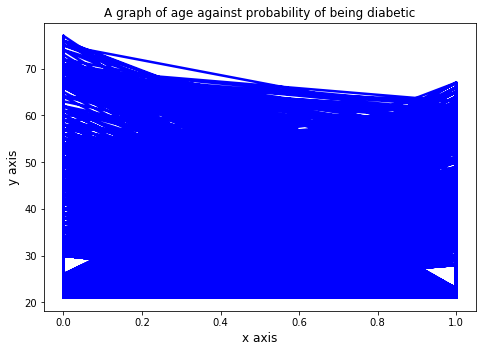

In [30]:
#Graph of age against probability of being diabetic 
#Note , haven't used the colours given , they are giving errors
x=mydataframe['Diabetic']
y=mydataframe['Age']
myfig=plt.figure()
axes=myfig.add_axes([0.1,0.1,1,1])
axes.plot(x,y,color='blue',lw=2.5)
axes.set_xlabel('x axis',fontsize=12)
axes.set_ylabel('y axis',fontsize=12)
axes.set_title('A graph of age against probability of being diabetic')

In [34]:
#The most favourite section , creating and answering my own questions !
#Numpy
#Question 
#Find the standard deviation for the ages in the dataset
mydataframe['Age'].std()

12.08970251588857

In [49]:
#Pandas
#Get the sum of Pregnancies and ages  in the dataset
mydataframe['sum_of_pregnancies_and_ages']=mydataframe['Pregnancies']+  mydataframe['Age']
                                         

mydataframe['sum_of_pregnancies_and_ages'].head(10)

0    21
1    31
2    30
3    52
4    23
5    26
6    21
7    26
8    61
9    27
Name: sum_of_pregnancies_and_ages, dtype: int64

Text(0.5, 1.0, 'My title')

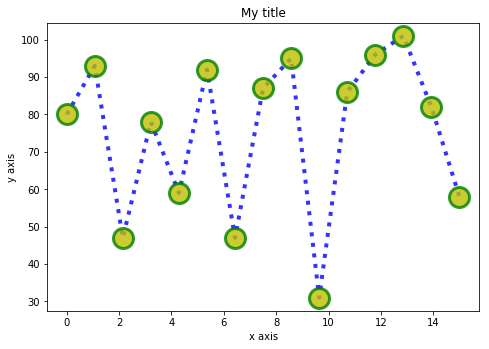

In [51]:
#Matplotlib
#Draw a graph of first 15 DiastolicBloodPressure values againt numbers 1 to 15
x=np.linspace(0,15,15)
y=mydataframe['DiastolicBloodPressure'].head(15)
myfig=plt.figure()
axes=myfig.add_axes([0.1,0.1,1,1])
axes.plot(x,y,color='b',lw=4,alpha=0.8,ls=":",
          marker="o",markersize=20,markerfacecolor="y",
          markeredgewidth=3,markeredgecolor='g')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('My title')

In [54]:
#Seaborn
import seaborn as sns

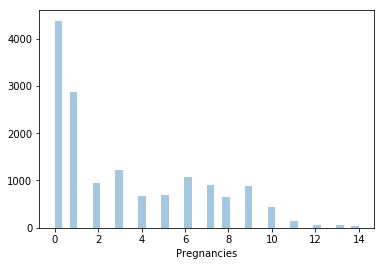

In [55]:
sns.distplot(mydataframe['Pregnancies'],kde=False,bins=40)